## Import Library

In [3]:
import matplotlib.pyplot as plt  # visualiasi 1
import numpy as np  # olah angka
import pandas as pd  # olah data
import seaborn as sns  # visualisasi 2
from sklearn.cluster import KMeans  # unsupervised model

# keperluan feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import silhouette_score  # menghitung silhouette score

# pengkodean ordinal data, dan skala data
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler

# visualisasi silhouette score dan elbow score
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

## Memuat Dataset

In [4]:
df = pd.read_csv('Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


- Jumlah Baris ada 2000 dan kolom 8
- 2 kolom kategorikal (object) dan 6 kolom numerikal (int64)

### Cek Missing Value

In [6]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
Profession,35


In [7]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [8]:
df[df["Profession"].isna()].describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1011.171429,52.628571,117233.828571,44.428571,4.657143,4.400000
std,528.974562,29.439955,40129.777321,24.924929,3.685766,2.032095
min,80.000000,0.000000,36000.000000,3.000000,0.000000,1.000000
25%,622.000000,26.500000,89422.000000,23.000000,1.000000,3.000000
50%,1010.000000,58.000000,121377.000000,42.000000,5.000000,4.000000
75%,1401.500000,75.000000,147630.000000,65.500000,7.000000,6.000000
max,1933.000000,99.000000,186655.000000,87.000000,12.000000,7.000000


In [9]:
df[(df["Profession"].isna()) & (df["Work Experience"] == 0) & (df["Annual Income ($)"] == 0)]  # asumsinya dia belum bekerja

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size


### Cek Data Duplikat

In [10]:
df.duplicated(subset=["CustomerID"]).sum()

np.int64(0)

In [11]:
df["CustomerID"].astype(str).describe()

,CustomerID
count,2000
unique,2000
top,1984
freq,1


| CustomerID | B | C |
| - | - | - |
| 1 | 2 | 1 |
| 1 | 2 | 2 |


### Analisis Distribusi dan Korelasi

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [13]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
numeric_features = numeric_features[1:]  # exclude CustomerID
numeric_features

Index(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience',
       'Family Size'],
      dtype='object')

In [14]:
# numeric_features = df.select_dtypes(include=['number']).columns
# numeric_features

In [15]:
df[numeric_features].describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


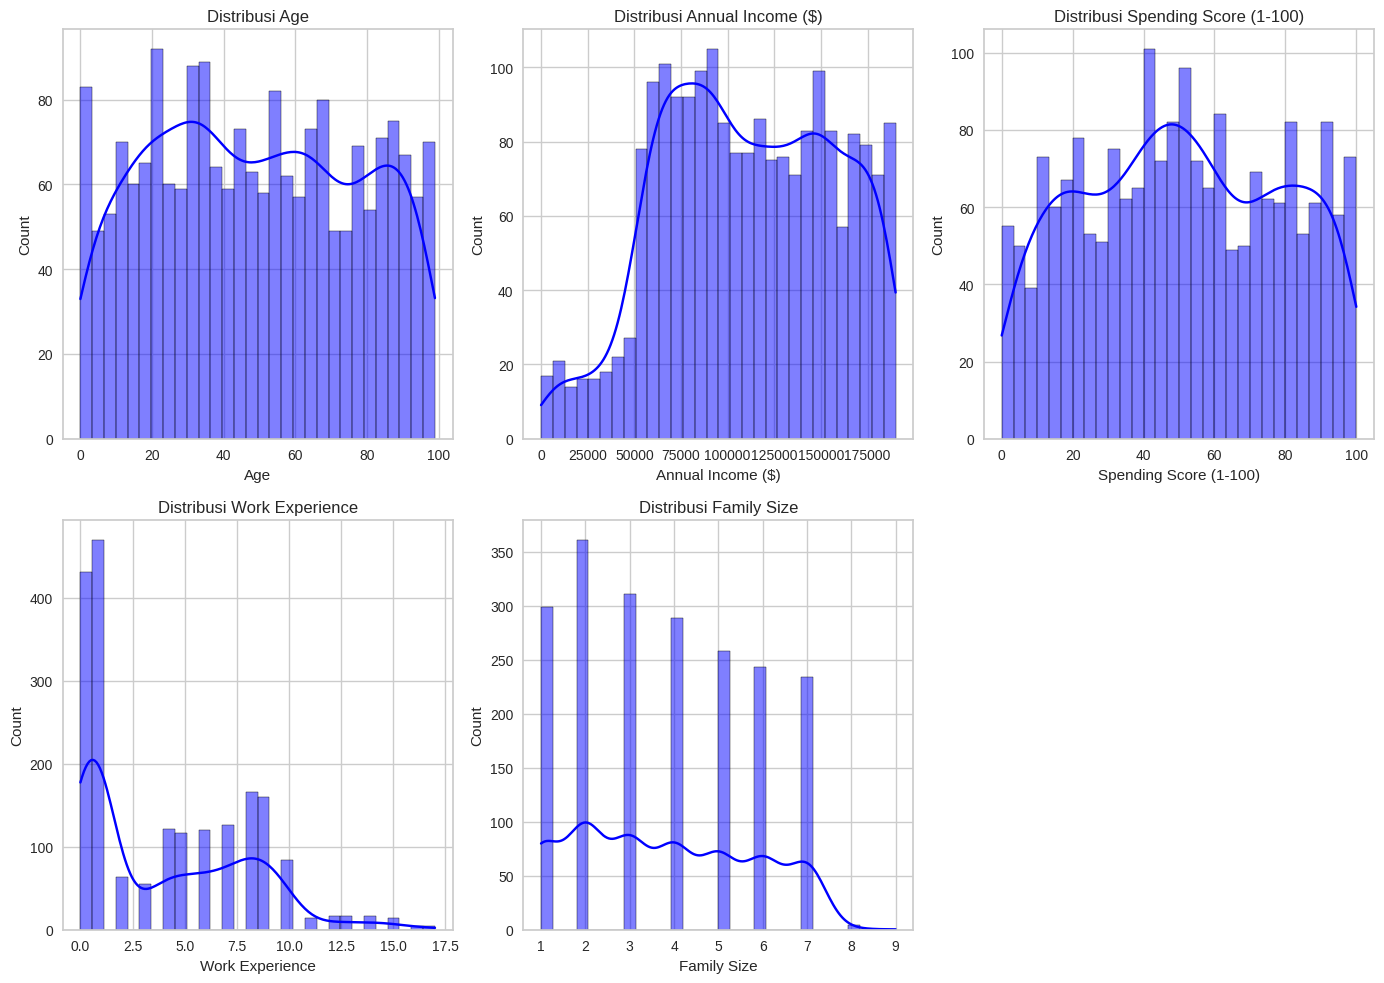

In [16]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

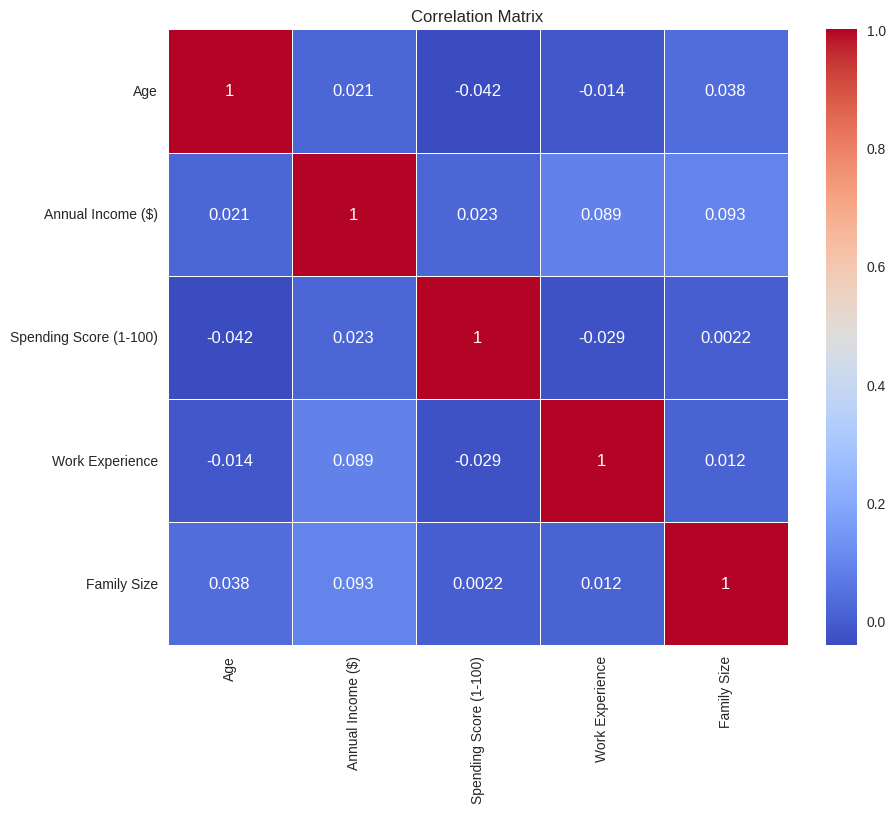

In [17]:
# Membuat matriks korelasi
correlation_matrix = df[numeric_features].corr()

# Menampilkan heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Visualisasi Data

In [18]:
# Distribusi fitur kategorikal
cat_features = df.select_dtypes(include=[object])
cat_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      2000 non-null   object
 1   Profession  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [19]:
# df.select_dtypes(exclude="number")

In [20]:
unique_values = cat_features.nunique()
unique_values

,0
Gender,2
Profession,9


In [21]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

<ipython-input-22-f968d4c8f7db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis', stat="percent")


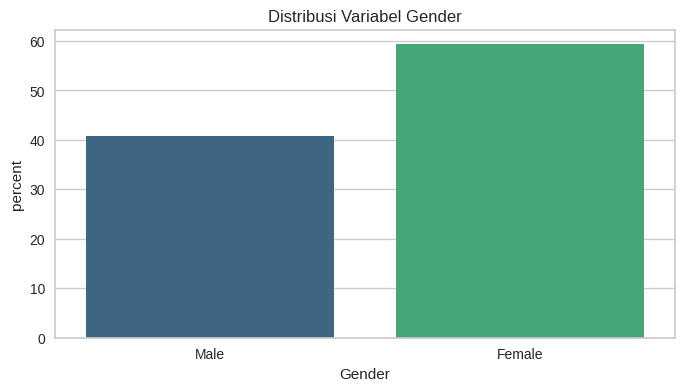

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x='Gender', data=df, palette='viridis', stat="percent")
plt.title('Distribusi Variabel Gender')
plt.show()

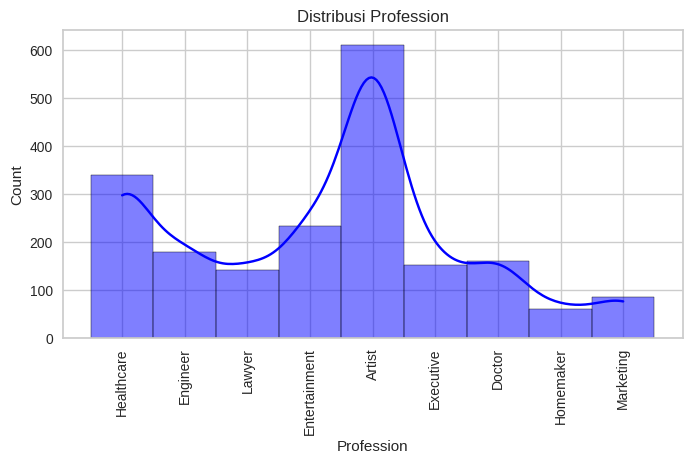

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(df['Profession'], bins=50, kde=True, color='blue')
plt.ylabel("Count")
plt.title("Distribusi Profession")
plt.xticks(rotation=90)
plt.show()


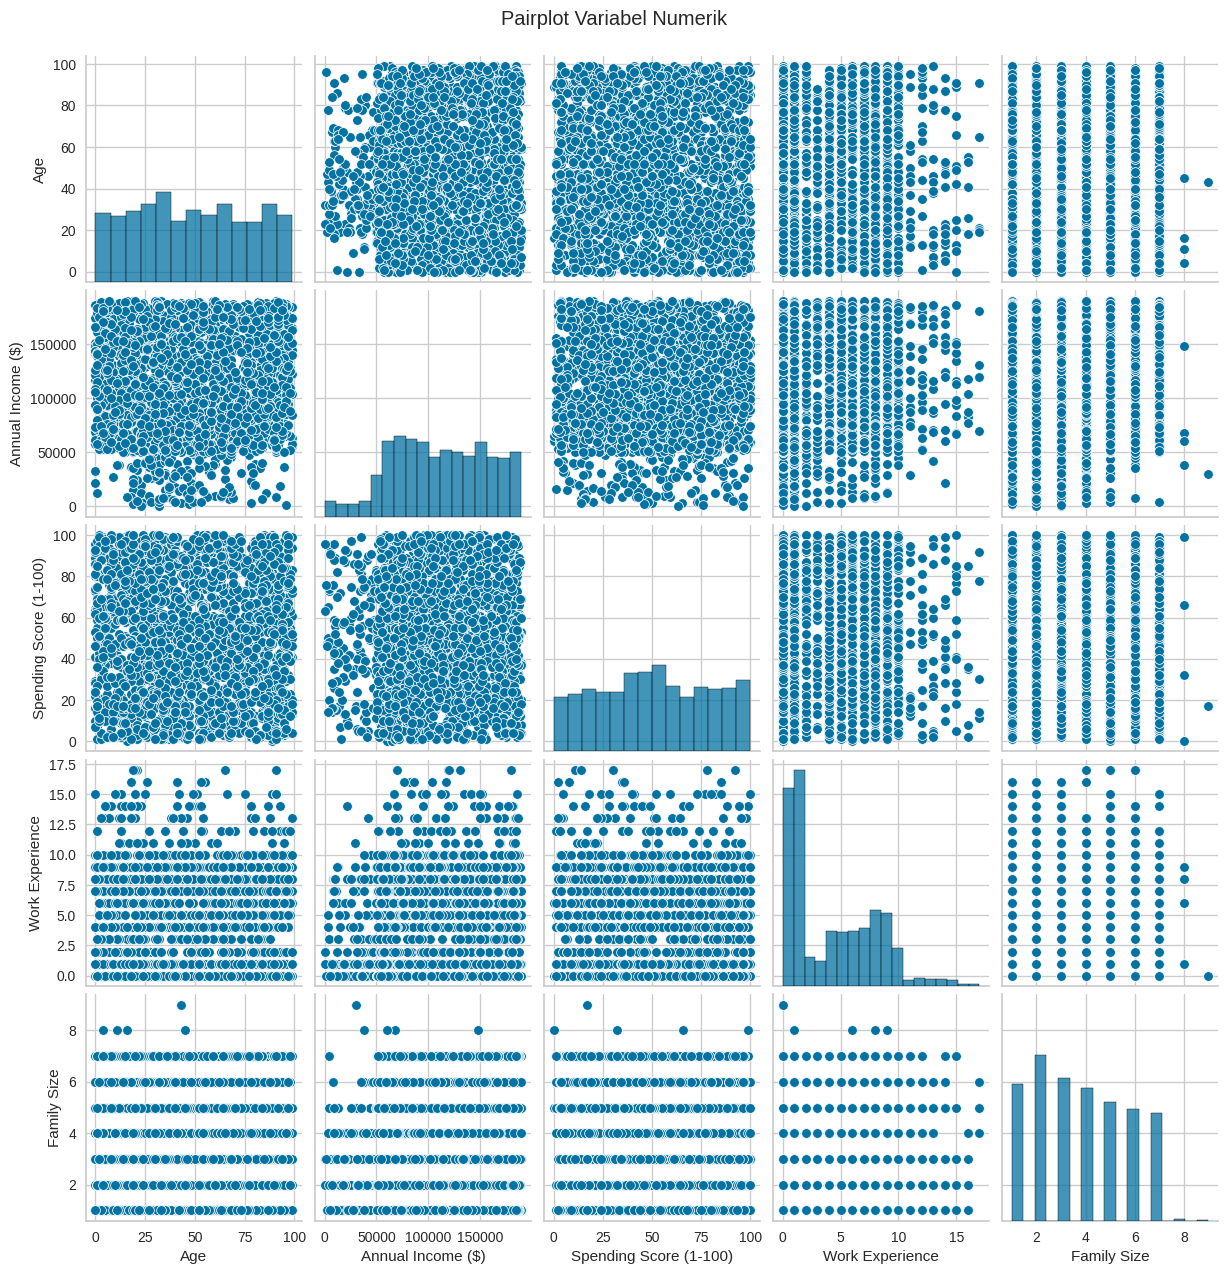

In [24]:
# Pairplot untuk Korelasi Variabel Numerik
sns.pairplot(df[numeric_features])
plt.suptitle('Pairplot Variabel Numerik', y=1.02)
plt.show()

## Data Preprocessing

### Menghapus Missing Values

In [25]:
df.dropna(subset=['Profession'], inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


### Deteksi dan Penanganan Outlier

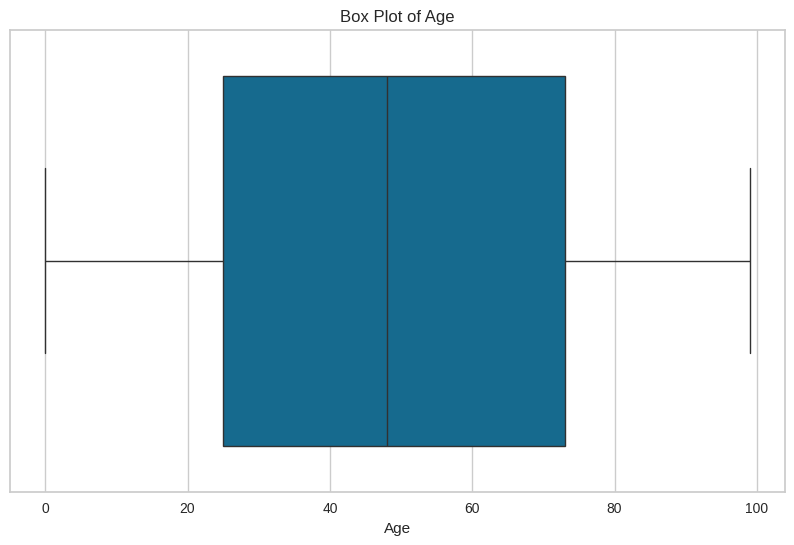

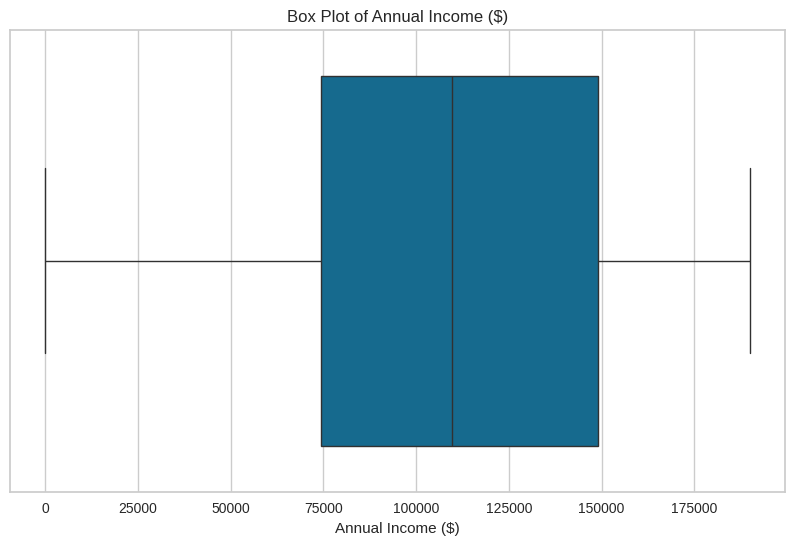

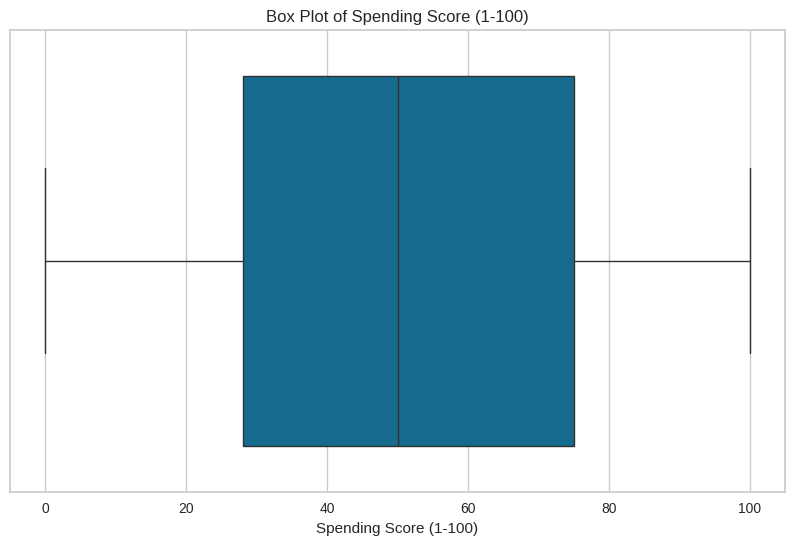

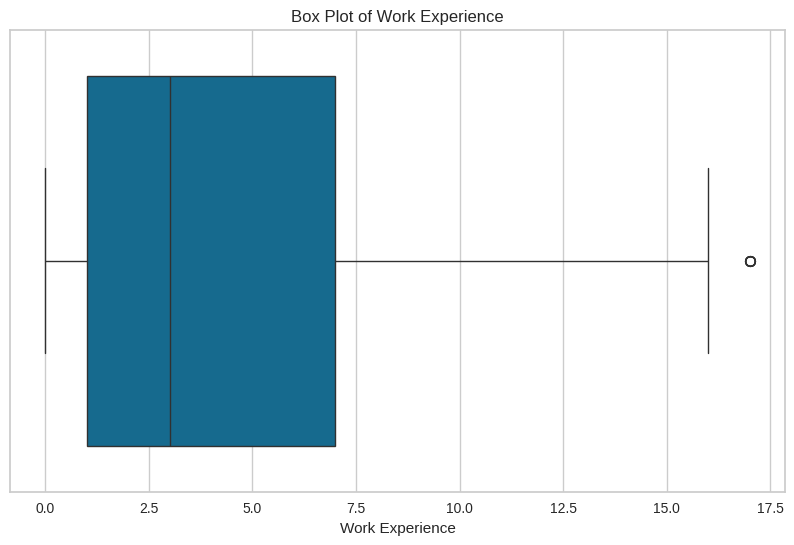

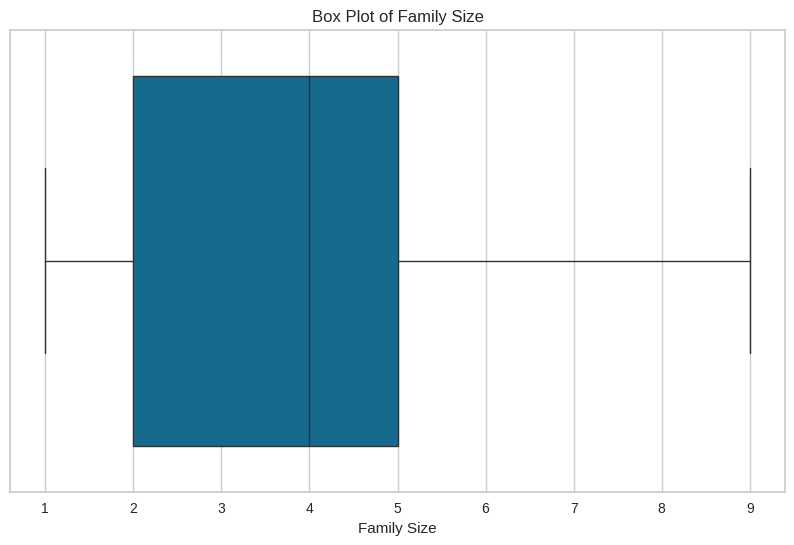

In [27]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [28]:
Q1 = (df['Work Experience']).quantile(0.25)
Q3 = (df['Work Experience']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df['Work Experience'] < minimum
kondisi_more_than = df['Work Experience'] > maximum

df.drop(df[kondisi_lower_than].index, inplace=True)
df.drop(df[kondisi_more_than].index, inplace=True)

# atau pakai zscore

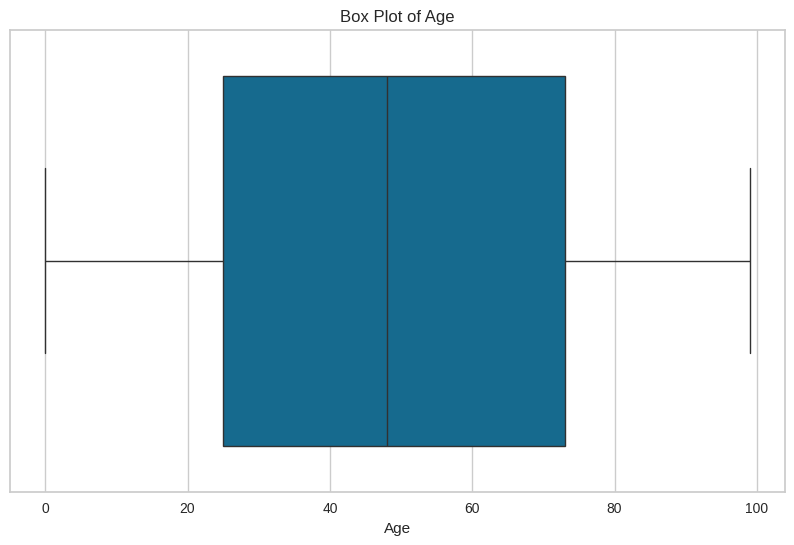

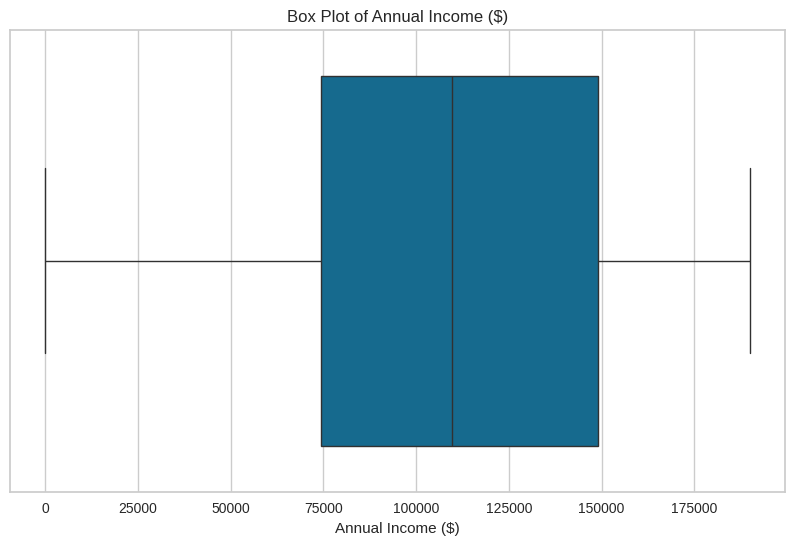

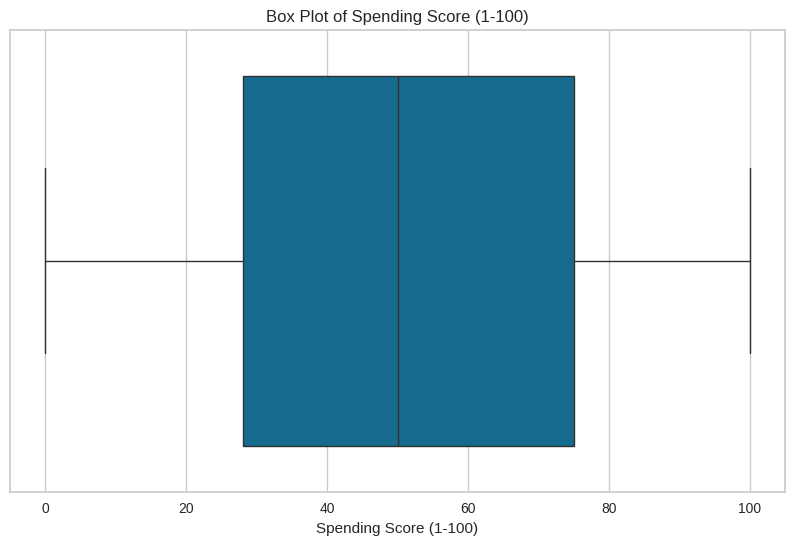

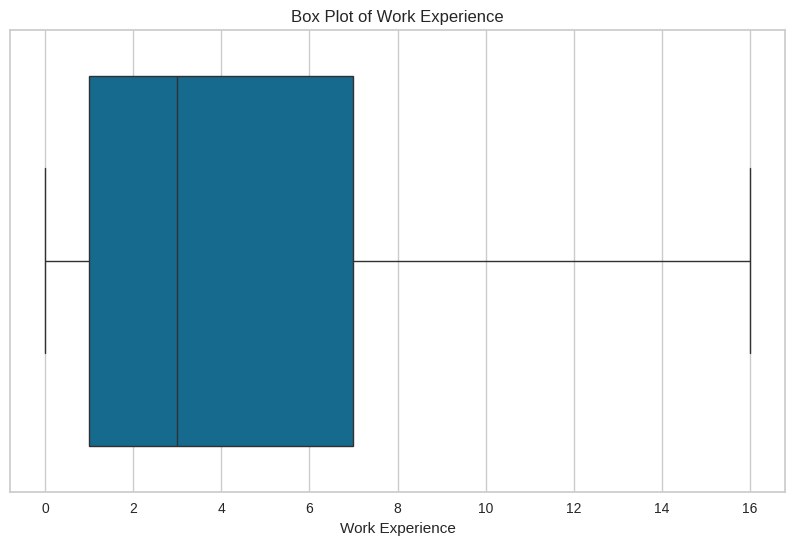

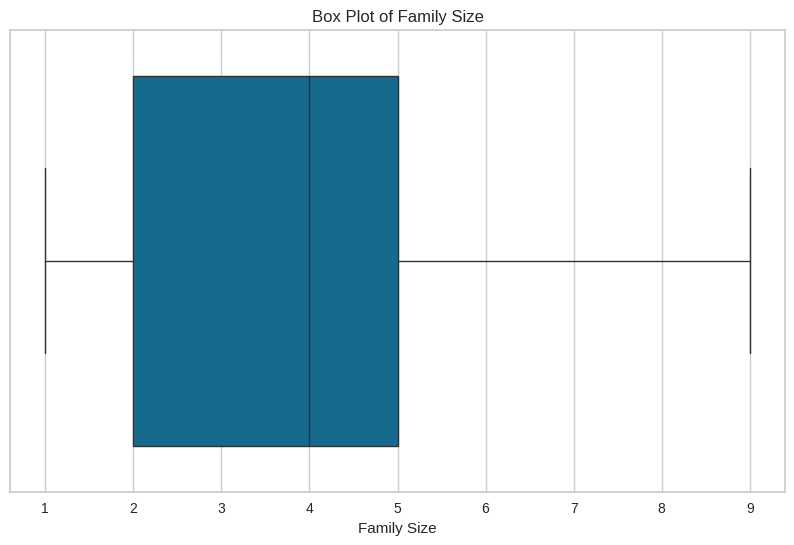

In [29]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1960 non-null   int64 
 1   Gender                  1960 non-null   object
 2   Age                     1960 non-null   int64 
 3   Annual Income ($)       1960 non-null   int64 
 4   Spending Score (1-100)  1960 non-null   int64 
 5   Profession              1960 non-null   object
 6   Work Experience         1960 non-null   int64 
 7   Family Size             1960 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 137.8+ KB


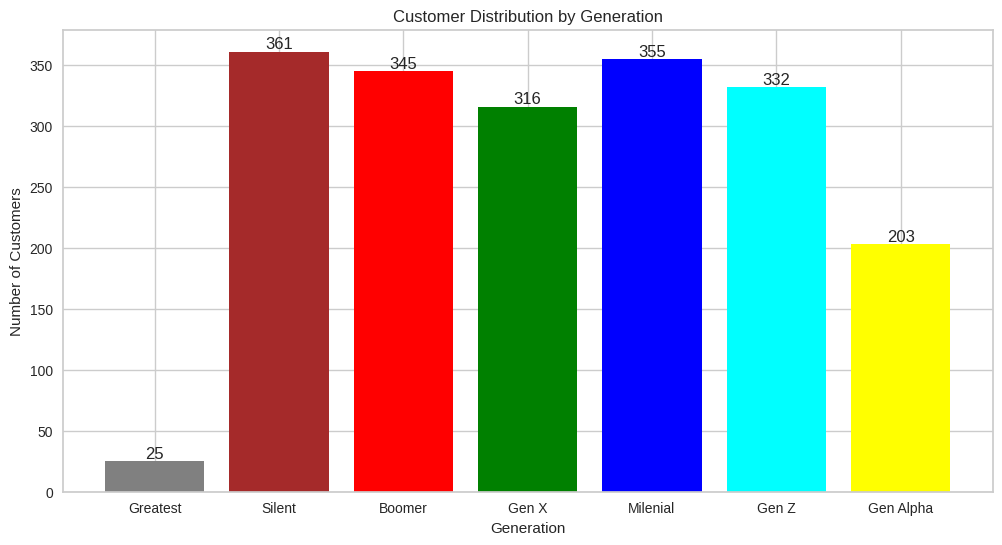

In [31]:
# Menentukan kategori generasi berdasarkan usia
gen_greatest = df.Age[df.Age >= 98]
gen_silent = df.Age[(df.Age >= 80) & (df.Age <= 97)]
gen_boomer = df.Age[(df.Age >= 61) & (df.Age <= 79)]
gen_x = df.Age[(df.Age >= 45) & (df.Age <= 60)]
gen_milenial = df.Age[(df.Age >= 29) & (df.Age <= 44)]
gen_z = df.Age[(df.Age >= 13) & (df.Age <= 28)]
gen_alpha = df.Age[(df.Age >= 1) & (df.Age <= 12)]

# Menyiapkan data untuk visualisasi
x = ["Greatest", "Silent", "Boomer", "Gen X", "Milenial", "Gen Z", "Gen Alpha"]
y = [gen_greatest.count(), gen_silent.count(), gen_boomer.count(), gen_x.count(), gen_milenial.count(), gen_z.count(), gen_alpha.count()]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(12, 6))
plt.bar(x, y, color=['gray', 'brown', 'red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer Distribution by Generation")
plt.xlabel("Generation")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i, v in enumerate(y):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.show()


[Referensi Kategori Generasi](https://www.tempo.co/gaya-hidup/nama-generasi-berdasarkan-umur-ada-milennial-sampai-gen-z-29100)

In [32]:
# Fungsi untuk menentukan generasi berdasarkan usia
# def assign_generation(age):
#     if age >= 98:
#         return "Greatest"
#     elif 80 <= age <= 97:
#         return "Silent"
#     elif 61 <= age <= 79:
#         return "Boomer"
#     elif 45 <= age <= 60:
#         return "Gen X"
#     elif 29 <= age <= 44:
#         return "Millennial"
#     elif 13 <= age <= 28:
#         return "Gen Z"
#     elif 1 <= age <= 12:
#         return "Alpha"
#     else:
#         return "Other"


# Menambahkan kolom 'Generation' ke DataFrame
df['Generation'] = pd.cut(df["Age"], [-1, 12, 28, 44, 60, 79, 97, np.inf],
                          labels=[i for i in range(7)], right=True,
                          ordered=True)

# Menghitung jumlah pelanggan per generasi
generation_counts = df['Generation'].value_counts()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              1960 non-null   int64   
 1   Gender                  1960 non-null   object  
 2   Age                     1960 non-null   int64   
 3   Annual Income ($)       1960 non-null   int64   
 4   Spending Score (1-100)  1960 non-null   int64   
 5   Profession              1960 non-null   object  
 6   Work Experience         1960 non-null   int64   
 7   Family Size             1960 non-null   int64   
 8   Generation              1960 non-null   category
dtypes: category(1), int64(6), object(2)
memory usage: 140.1+ KB


In [35]:
cat_features = df.select_dtypes(exclude=["number"]).columns

In [36]:
cat_features = df.select_dtypes(include=['object', 'category']).columns
cat_features

Index(['Gender', 'Profession', 'Generation'], dtype='object')

In [37]:
df["is Male"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)

**label encoder vs ordinal encoder**

- label encoder bekerja hanya untuk 1 kolom, biasanya dipakai untuk kolom target (y). Sebaliknya, ordinal encoder bekerja pada 1 atau lebih kolom sekaligus, biasa digunakan untuk fitur (X)

- label encoder tidak mengasumsikan data nya memiliki urutan (contoh: pekerjaan). Sebaliknya, ordinal encoder mengasumsikan datanya memiliki urutan (contoh: tingkat pendidikan)

In [38]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df["Profession"] = label_encoder.fit_transform(df["Profession"])

# Menampilkan hasil
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Generation,is Male
0,1,Male,19,15000,39,5,1,4,1,1
1,2,Male,21,35000,81,2,3,3,1,1
2,3,Female,20,86000,6,2,1,1,1,0
3,4,Female,23,59000,77,7,0,2,1,0
4,5,Female,31,38000,40,3,2,6,2,0


In [40]:
# Standardisasi fitur numerik
# scaler = StandardScaler().set_output(transform="pandas")
# df[['Annual Income ($)', 'Work Experience', 'Family Size', "Profession"]] = scaler.fit_transform(df[['Annual Income ($)', 'Work Experience','Family Size', "Profession"]])

# min_max_scaler1 = MinMaxScaler().set_output(transform="pandas")
# df[['Spending Score (1-100)']] = min_max_scaler1.fit_transform(df[['Spending Score (1-100)']])

# min_max_scaler2 = MinMaxScaler().set_output(transform="pandas")
# df[["Generation"]] = min_max_scaler2.fit_transform(df[["Generation"]])

# df.head()


## Pembangunan Model Clustering

In [41]:

# Memilih fitur yang akan digunakan untuk clustering
features = ["Generation", 'Spending Score (1-100)', 'Annual Income ($)']

# Menggabungkan fitur numerikal dan kategorikal
X = df[features]

# Inisialisasi model KMeans
kmeans = KMeans(n_clusters=4, random_state=42)

# Melakukan clustering
clusters = kmeans.fit_predict(X)

# Menambahkan hasil clustering ke DataFrame
df['Cluster'] = clusters

# Menampilkan hasil clustering
df.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Generation,is Male,Cluster
0,1,Male,19,15000,39,5,1,4,1,1,2
1,2,Male,21,35000,81,2,3,3,1,1,2
2,3,Female,20,86000,6,2,1,1,1,0,1
3,4,Female,23,59000,77,7,0,2,1,0,1
4,5,Female,31,38000,40,3,2,6,2,0,2


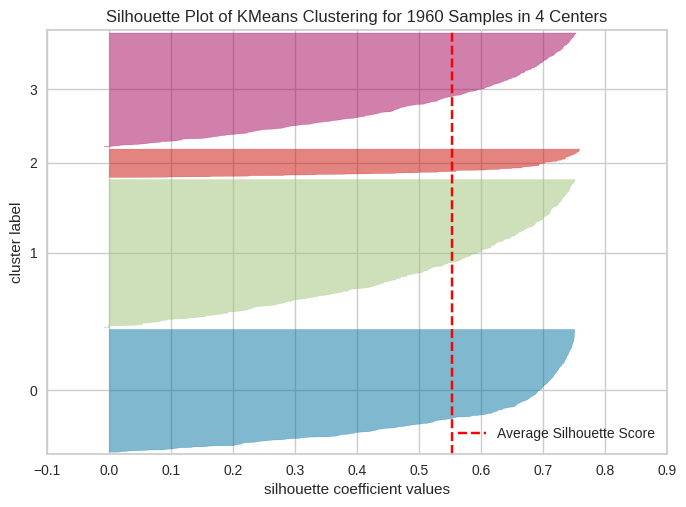

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1960 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

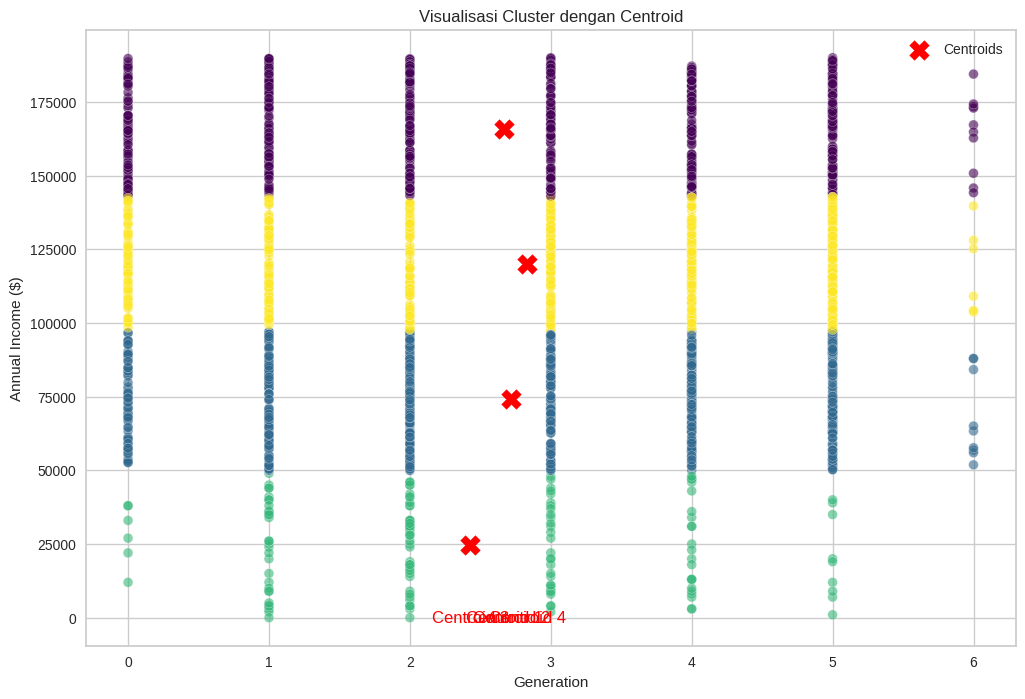

Nilai Centroids:
Centroid 1: Generation = 2.67, Spending Score = 51.63
Centroid 2: Generation = 2.72, Spending Score = 49.40
Centroid 3: Generation = 2.43, Spending Score = 50.78
Centroid 4: Generation = 2.83, Spending Score = 52.78


In [43]:

# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=clusters, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Generation')
plt.ylabel('Annual Income ($)')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Generation = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

## Evaluasi Model Clustering

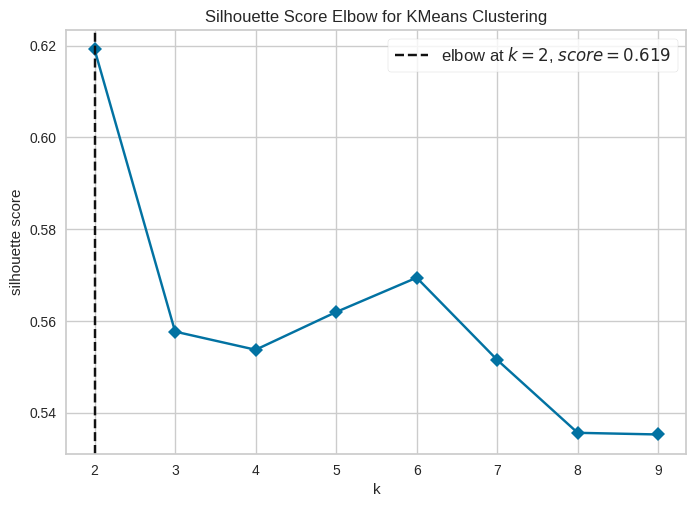

For n_clusters = 2, the average silhouette_score is: 0.6191774428996767
For n_clusters = 3, the average silhouette_score is: 0.5576902705096815
For n_clusters = 4, the average silhouette_score is: 0.5537318418529704
For n_clusters = 5, the average silhouette_score is: 0.561953967598407
For n_clusters = 6, the average silhouette_score is: 0.5694421332518652
For n_clusters = 7, the average silhouette_score is: 0.5515249092586566
For n_clusters = 8, the average silhouette_score is: 0.5356318508412498
For n_clusters = 9, the average silhouette_score is: 0.535271771546132
For n_clusters = 10, the average silhouette_score is: 0.5466913695082168


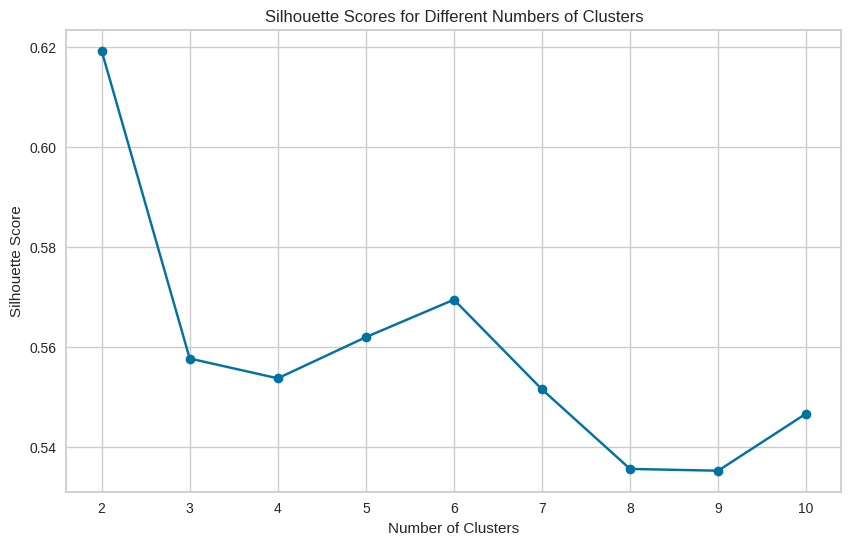

In [44]:
# Elbow Method
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)
visualizer.fit(X)
visualizer.show()

# Silhouette Scores
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
# Silhouette Score for different numbers of clusters

In [45]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
sil_score = silhouette_score(X, labels)

print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.62


## Feature Selection

In [64]:
# Inisialisasi model Logistic Regression untuk RFE
model = LogisticRegression(max_iter=1000)

# Inisialisasi RFE dengan model Logistic Regression
rfe = RFE(model, n_features_to_select=2)  # Pilih jumlah fitur yang diinginkan

# Fit RFE ke data
rfe = rfe.fit(X, df['Cluster'])

# Menampilkan fitur yang dipilih
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Generation', 'Spending Score (1-100)'], dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# Clustering dengan fitur yang dipilih
X_selected = X[selected_features]

# Inisialisasi model KMeans
kmeans_selected = KMeans(n_clusters=2, random_state=42)

# Melakukan clustering
clusters_selected = kmeans_selected.fit_predict(X_selected)

# Menambahkan hasil clustering ke DataFrame
df['Cluster_Selected'] = clusters_selected

# Evaluasi hasil clustering menggunakan Silhouette Score
silhouette_avg_selected = silhouette_score(X_selected, clusters_selected)
print(f"Silhouette Score setelah feature selection: {silhouette_avg_selected}")

# Silhouette Score sebelum feature selection
silhouette_avg_before = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score sebelum feature selection: {silhouette_avg_before}")

# Menampilkan hasil clustering
df.head()


Silhouette Score setelah feature selection: 0.5926182691209242
Silhouette Score sebelum feature selection: 0.5537318418529704


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Generation,is Male,Cluster,Cluster_Selected
0,1,Male,19,15000,39,5,1,4,1,1,2,0
1,2,Male,21,35000,81,2,3,3,1,1,2,1
2,3,Female,20,86000,6,2,1,1,1,0,1,0
3,4,Female,23,59000,77,7,0,2,1,0,1,1
4,5,Female,31,38000,40,3,2,6,2,0,2,0


## Visualisasi Hasil Clustering

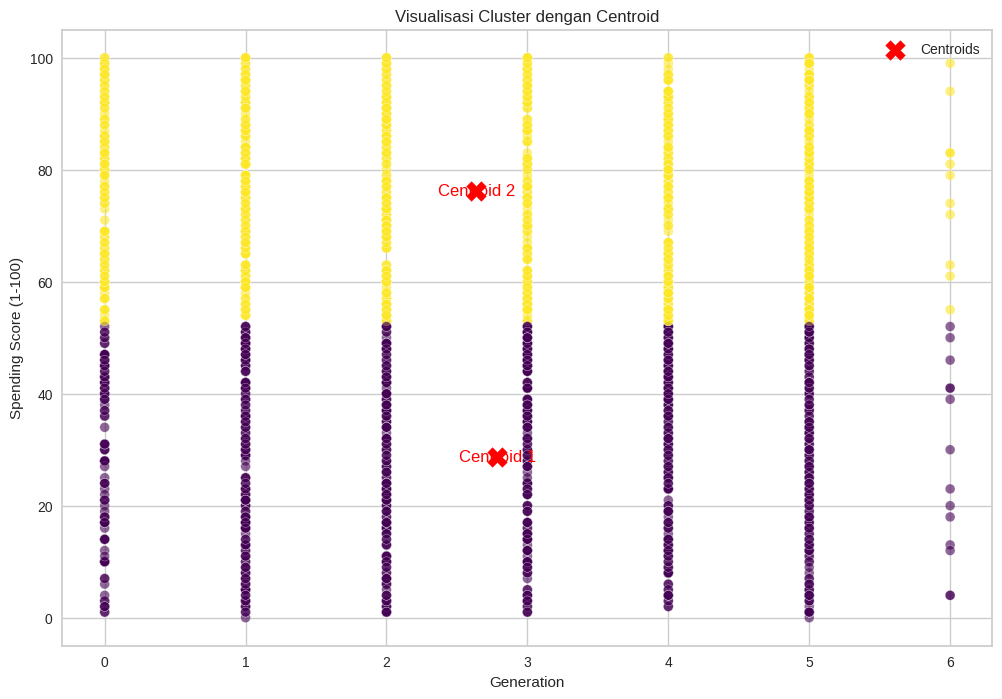

Nilai Centroids:
Centroid 1: Generation = 2.79, Spending Score (1-100) = 28.66
Centroid 2: Generation = 2.64, Spending Score (1-100) = 76.25


In [48]:
# Menentukan posisi centroid
centroids_selected = kmeans_selected.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], c=clusters_selected, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids_selected[:, 0], centroids_selected[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids_selected):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Generation')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids_selected):
    print(f"Centroid {i+1}: Generation = {centroid[0]:.2f}, Spending Score (1-100) = {centroid[1]:.2f}")

## Analisis dan Interpretasi Hasil Cluster

#### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              1960 non-null   int64   
 1   Gender                  1960 non-null   object  
 2   Age                     1960 non-null   int64   
 3   Annual Income ($)       1960 non-null   int64   
 4   Spending Score (1-100)  1960 non-null   int64   
 5   Profession              1960 non-null   int64   
 6   Work Experience         1960 non-null   int64   
 7   Family Size             1960 non-null   int64   
 8   Generation              1960 non-null   category
 9   is Male                 1960 non-null   int64   
 10  Cluster                 1960 non-null   int32   
 11  Cluster_Selected        1960 non-null   int32   
dtypes: category(1), int32(2), int64(8), object(1)
memory usage: 170.7+ KB


In [50]:
print(cat_features)

Index(['Gender', 'Profession', 'Generation'], dtype='object')


In [51]:
df['Profession'] = label_encoder.inverse_transform(df['Profession'])

In [52]:
# Mapping angka di kolom 'Generation' sesuai ketentuan
generation_mapping = {
    0: 'Gen Alpha',
    1: 'Gen Z',
    2: 'Millenial',
    3: 'Gen X',
    4: 'Boomer',
    5: 'Silent',
    6: 'Greatest'
}
df['Generation'] = df['Generation'].map(generation_mapping)


In [53]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Generation,is Male,Cluster,Cluster_Selected
0,1,Male,19,15000,39,Healthcare,1,4,Gen Z,1,2,0
1,2,Male,21,35000,81,Engineer,3,3,Gen Z,1,2,1
2,3,Female,20,86000,6,Engineer,1,1,Gen Z,0,1,0
3,4,Female,23,59000,77,Lawyer,0,2,Gen Z,0,1,1
4,5,Female,31,38000,40,Entertainment,2,6,Millenial,0,2,0


#### Analisis Deskriptif

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              1960 non-null   int64   
 1   Gender                  1960 non-null   object  
 2   Age                     1960 non-null   int64   
 3   Annual Income ($)       1960 non-null   int64   
 4   Spending Score (1-100)  1960 non-null   int64   
 5   Profession              1960 non-null   object  
 6   Work Experience         1960 non-null   int64   
 7   Family Size             1960 non-null   int64   
 8   Generation              1960 non-null   category
 9   is Male                 1960 non-null   int64   
 10  Cluster                 1960 non-null   int32   
 11  Cluster_Selected        1960 non-null   int32   
dtypes: category(1), int32(2), int64(7), object(2)
memory usage: 170.7+ KB


In [55]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,is Male,Cluster,Cluster_Selected
count,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000
mean,1001.614796,48.909184,110581.933673,51.094388,4.059694,3.753571,0.406633,1.323469,0.471429
std,578.587451,28.410376,45852.804233,27.959731,3.876871,1.969131,0.491331,1.168962,0.499310
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,500.750000,25.000000,74339.500000,28.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,1002.500000,48.000000,109660.500000,50.000000,3.000000,4.000000,0.000000,1.000000,0.000000
75%,1503.250000,73.000000,149097.000000,75.000000,7.000000,5.000000,1.000000,3.000000,1.000000
max,2000.000000,99.000000,189974.000000,100.000000,16.000000,9.000000,1.000000,3.000000,1.000000


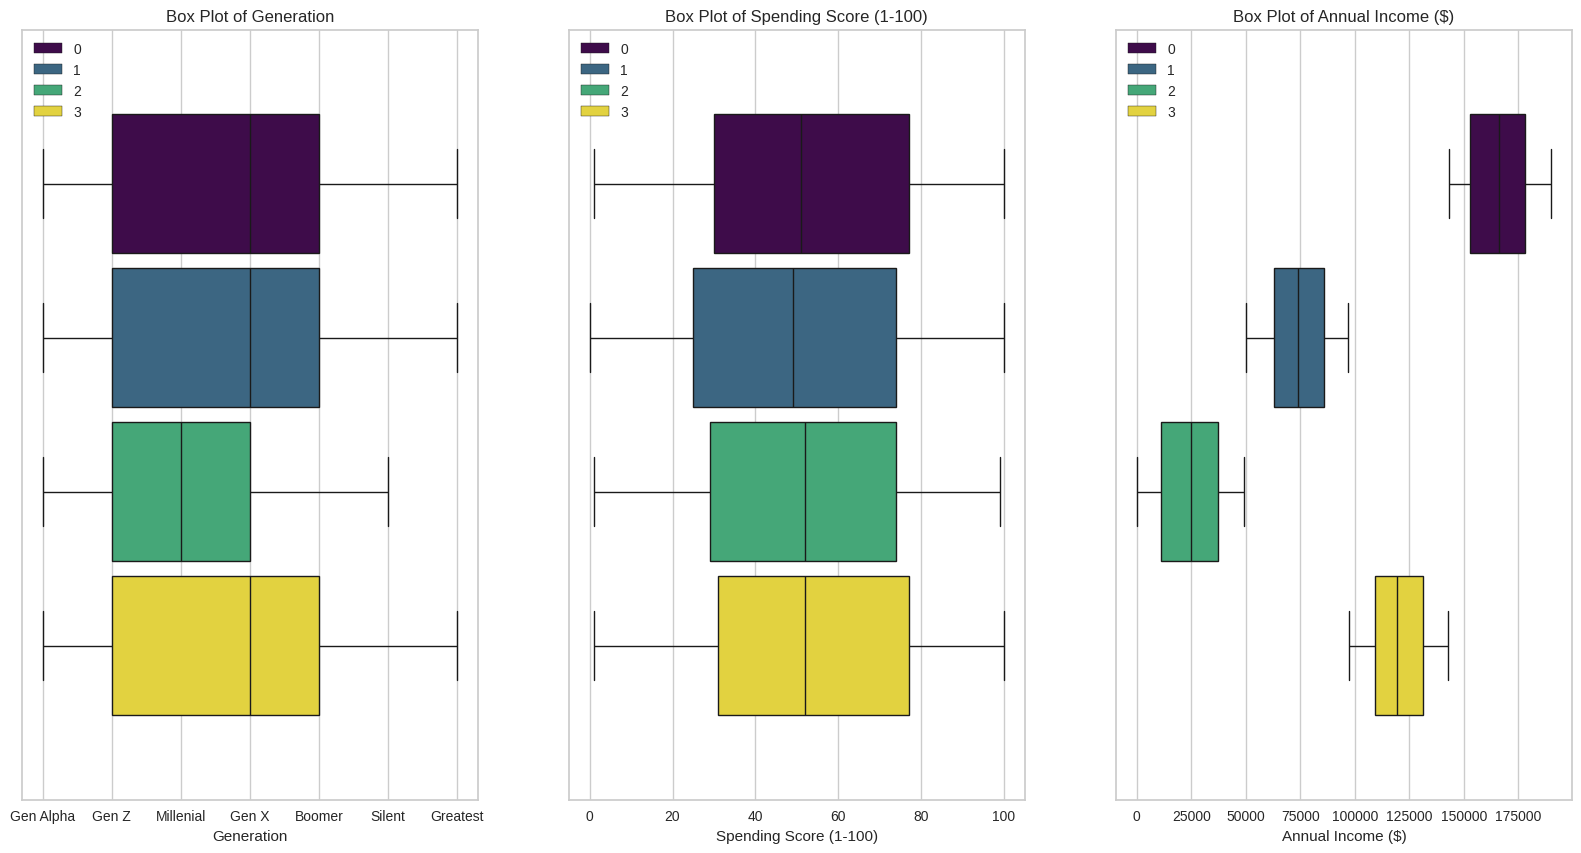

In [56]:
features = ["Generation", 'Spending Score (1-100)', 'Annual Income ($)']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[feature], hue=df['Cluster'], palette='viridis', gap=0.1)
    plt.legend(loc='upper left')
    plt.title(f'Box Plot of {feature}')

plt.show()

In [57]:
df.groupby("Cluster")['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,583.0,51.632933,27.548565,1.0,30.0,51.0,77.0,100.0
1,701.0,49.349501,28.337188,0.0,25.0,49.0,74.0,100.0
2,135.0,50.777778,27.336670,1.0,29.0,52.0,74.0,99.0
3,541.0,52.853974,28.005339,1.0,31.0,52.0,77.0,100.0


In [58]:
df.groupby("Cluster")['Annual Income ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,583.0,165746.344768,14057.084590,143000.0,152568.5,166007.0,178215.5,189974.0
1,701.0,74106.255350,13604.359376,50000.0,62893.0,74050.0,86000.0,97081.0
2,135.0,24511.111111,14381.199723,0.0,11000.0,25000.0,37500.0,49000.0
3,541.0,119876.129390,13112.714829,97185.0,109061.0,119259.0,131091.0,142892.0


In [59]:
df.groupby("Cluster").agg(Generation_Mode=("Generation", pd.Series.mode))

,Generation_Mode
Cluster,
0,Silent
1,Millenial
2,Millenial
3,Silent


Analisis Karakteristik untuk setiap cluster yang dihasilkan dari model KMeans

1. Cluster 0:
- **Rata - Rata Spending Score (1-100)** : 51.62
- **Rata - Rata Annual Income (\$)** : $165.746
- **Generasi Terbanyak** : Silent
- Analisis : Cluster ini dicakup oleh banyak Generasi Silent dengan rata-rata spending score yang cukup tinggi yang didukung dengan pendapatan yang tinggi. Cluster ini menunjukkan minat daya beli yang tinggi sehingga cenderung untuk membelanjakan sebagian besar pendapatan mereka

2. Cluster 1:
- **Rata - Rata Spending Score (1-100)** : 49.34
- **Rata - Rata Annual Income (\$)** : $74.106
- **Generasi Terbanyak** : Milenial
- Analisis : Cluster ini dicakup oleh banyak Generasi Milenial dengan rata-rata spending score yang cukup tinggi, meskipun pendapatan yang didapat itu sedang. Cluster ini menunjukkan minat daya beli yang tinggi serta mudah untuk membelanjakan uangnya yang didapatnya

3. Cluster 2:
- **Rata - Rata Spending Score (1-100)** : 50.77
- **Rata - Rata Annual Income (\$)** : $24.511
- **Generasi Terbanyak** : Milenial
- Analisis : Cluster ini dicakup oleh banyak Generasi Milenial dengan rata-rata spending score yang cukup tinggi, meskipun pendapatan yang didapat itu rendah. Cluster ini menunjukkan minat daya beli yang tinggi meskipun pendapatan yang rendah tetapi untuk melakukan pembelian.

4. Cluster 3:
- **Rata - Rata Spending Score (1-100)** :52.85
- **Rata - Rata Annual Income (\$)** : $119.876
- **Generasi Terbanyak** : Silent
- Analisis : Cluster ini dicakup oleh banyak Generasi Silent dengan rata-rata spending score yang tinggi yang didukung dengan pendapatan yang cukup tinggi, Cluster ini menunjukkan minat daya beli yang tinggi dengan sehingga cenderung untuk membelanjakan sebagian besar pendapatan mereka

### Mengeksport Data

In [60]:
df.to_csv('Dataset_inisiasi.csv', index=False)

### Optional Terkait Penjelasan BoxPlot dan Modus di Kategorikal

In [61]:
df[df["Cluster"] == 0]['Generation'].describe()

,Generation
count,583
unique,7
top,Silent
freq,106


In [62]:
df['Generation'].max()


'Greatest'

In [63]:
df[df["Cluster"] == 2]['Generation'].describe()

,Generation
count,135
unique,6
top,Millenial
freq,39
